In [ ]:
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [ ]:
base_dir="https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

In [ ]:
data=pd.read_csv(base_dir)
#read the datetime as datatime
data["datetime"]=pd.to_datetime(data["datetime"])
data["gold_price_change"]=data["gold_price_usd"].diff()

In [ ]:
data.head()

,datetime,gold_price_usd,gold_price_change
0,1978-12-29,137.06,NaN
1,1979-01-01,137.06,0.00
2,1979-01-02,137.29,0.23
3,1979-01-03,134.01,-3.28
4,1979-01-04,136.79,2.78


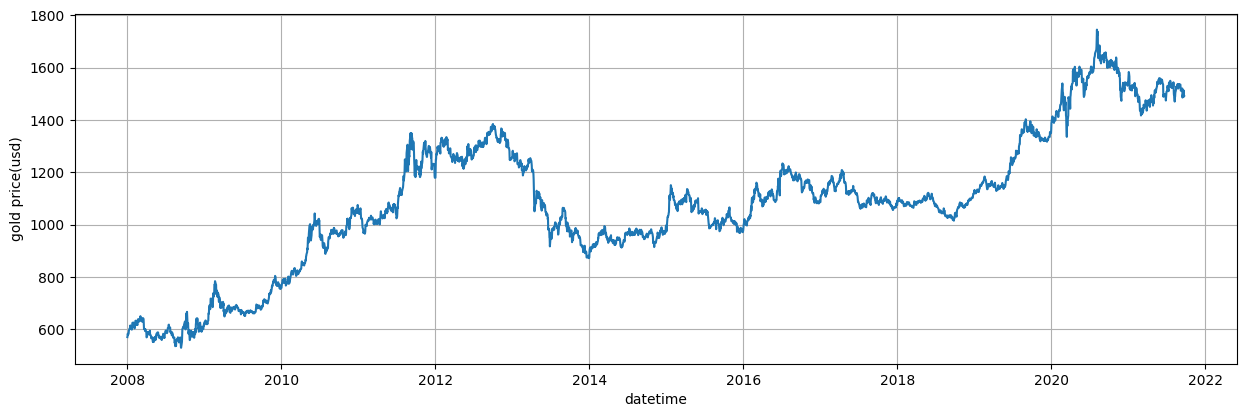

In [ ]:
data=data[data["datetime"] >=pd.to_datetime("2008-01-01")]
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(data["datetime"],data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price(usd)")
plt.grid(True)


covariance_type='diag' for each hidden state the covariance matrix for each multivariate Gaussian distribution in the mixture is diagonal and these matrixes may be different
we model the daily change in gold price-allows us to capture the state of the market ,we model a gaussian emission model with three hidden states, one for low,highand medium

In [ ]:
X=data[["gold_price_change"]].values
model=hmm.GaussianHMM(n_components=3,covariance_type="diag",n_iter=50,random_state=42)
model.fit(X)
Z=model.predict(X)
states=pd.unique(Z)

In [ ]:
print("unique states are ",states)
print("\nstart probabilities", model.startprob_)

unique states are  [1 0 2]

start probabilities [2.25217394e-05 9.99977478e-01 2.27517901e-54]


the transistion matrix for three hidden states,we will show the diagonal elements are larger


In [ ]:
print(model.transmat_)

[[1.18601839e-02 9.87982221e-01 1.57595016e-04]
 [7.39251441e-01 2.11663333e-01 4.90852259e-02]
 [6.21144512e-02 1.76534234e-02 9.20232125e-01]]


In [ ]:
print(model.covars_)

[[[ 84.22877262]]

 [[ 29.75024958]]

 [[321.61159569]]]


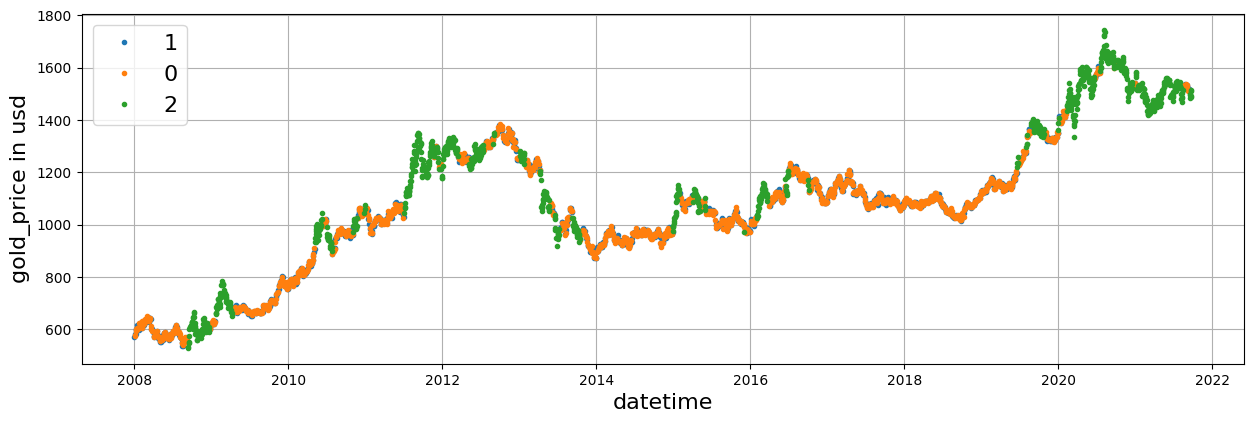

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
for i in states:
  want=(Z==i)
  x=data["datetime"].iloc[want]
  y=data["gold_price_usd"].iloc[want]
  plt.plot(x,y,'.')
  plt.legend(states,fontsize=16)
  plt.grid(True)
  plt.xlabel("datetime",fontsize=16)
  plt.ylabel("gold_price in usd",fontsize=16)


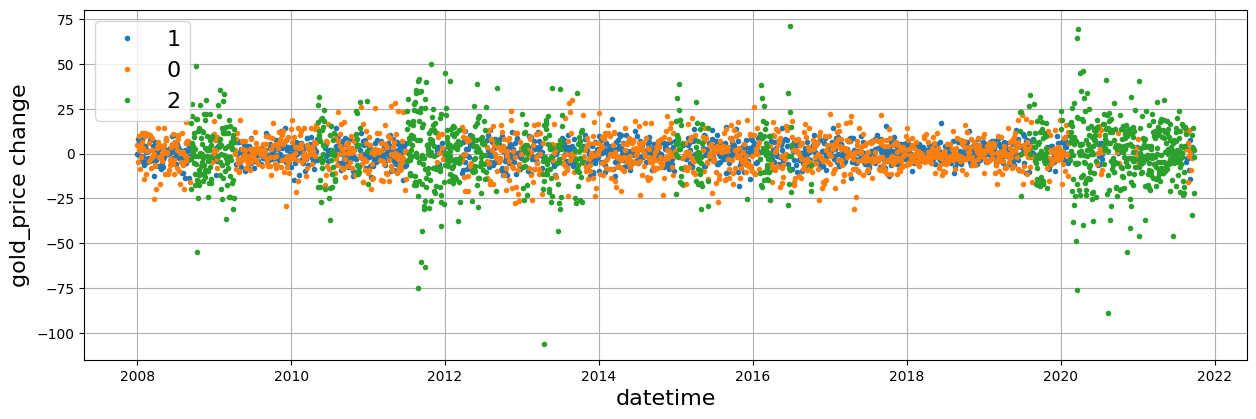

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
for i in states:
  want=(Z==i)
  x=data["datetime"].iloc[want]
  y=data["gold_price_change"].iloc[want]
  plt.plot(x,y,'.')
  plt.legend(states,fontsize=16)
  plt.grid(True)
  plt.xlabel("datetime",fontsize=16)
  plt.ylabel("gold_price change",fontsize=16)
